In [9]:
# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

In [10]:
# import zipfile

# # Unzip the dataset
# local_zip = './horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./horse-or-human')
# zip_ref.close()

In [11]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [12]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse04-3.png', 'horse35-3.png', 'horse46-6.png', 'horse01-9.png', 'horse11-6.png', 'horse41-6.png', 'horse43-5.png', 'horse37-5.png', 'horse25-0.png', 'horse16-2.png']
['human10-13.png', 'human08-12.png', 'human05-05.png', 'human15-26.png', 'human02-22.png', 'human08-30.png', 'human11-30.png', 'human16-01.png', 'human08-24.png', 'human01-25.png']


In [13]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

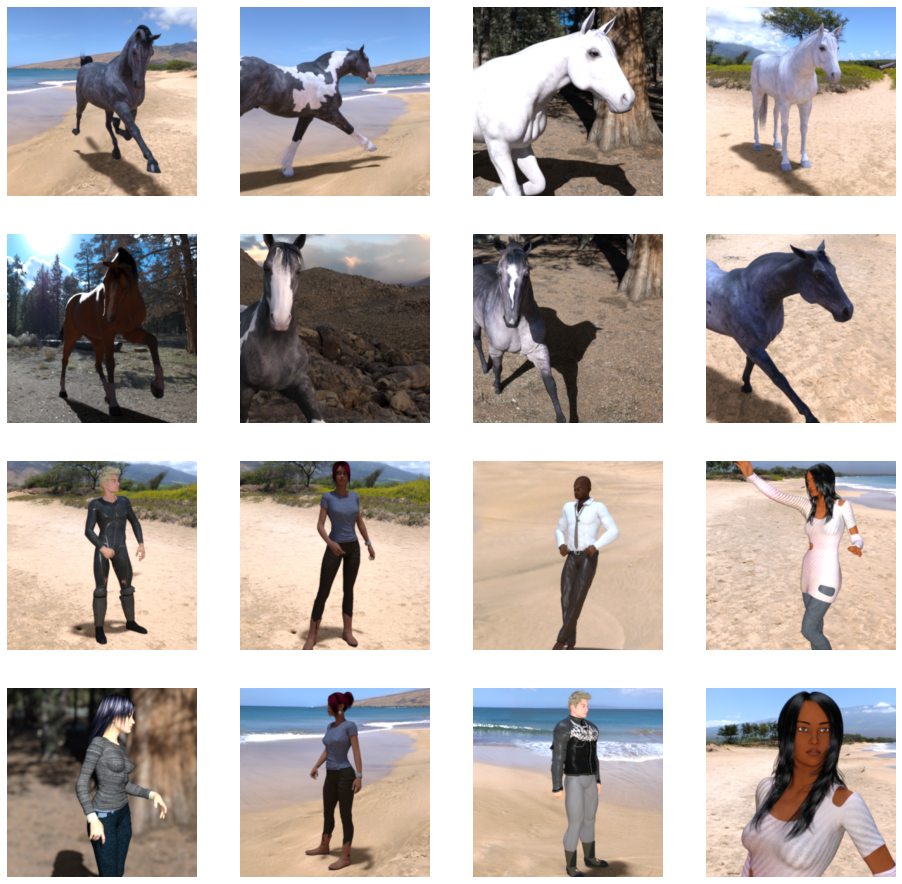

In [15]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [17]:
import tensorflow as tf

2022-06-16 11:48:15.491177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 11:48:15.491219: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-06-16 11:48:18.709196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-16 11:48:18.709239: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-16 11:48:18.709266: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fadilrisdian-X455LAB): /proc/driver/nvidia/version does not exist
2022-06-16 11:48:18.709621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [22]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15


2022-06-16 11:48:38.879595: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.
2022-06-16 11:48:41.698619: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.
2022-06-16 11:48:41.800745: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 727482368 exceeds 10% of free system memory.
2022-06-16 11:48:43.186168: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 181870592 exceeds 10% of free system memory.
2022-06-16 11:48:43.435207: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 354041856 exceeds 10% of free system memory.


8/8 [==============================] - 69s 8s/step - loss: 0.8827 - accuracy: 0.4828
Epoch 2/15
8/8 [==============================] - 67s 8s/step - loss: 1.0446 - accuracy: 0.6407
Epoch 3/15
8/8 [==============================] - 67s 8s/step - loss: 0.5668 - accuracy: 0.7308
Epoch 4/15
8/8 [==============================] - 66s 8s/step - loss: 0.6751 - accuracy: 0.7764
Epoch 5/15
8/8 [==============================] - 67s 8s/step - loss: 0.3322 - accuracy: 0.8687
Epoch 6/15
8/8 [==============================] - 67s 8s/step - loss: 0.2139 - accuracy: 0.9099
Epoch 7/15
8/8 [==============================] - 84s 10s/step - loss: 0.2701 - accuracy: 0.8954
Epoch 8/15


KeyboardInterrupt: 

In [ ]:
# ## CODE BLOCK FOR NON-SAFARI BROWSERS
# ## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(300, 300))
#   x = image.img_to_array(img)
#   x /= 255
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
    
#   if classes[0]>0.5:
#     print(fn + " is a human")
#   else:
#     print(fn + " is a horse")
 